In [3]:
.libPaths("/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library")

In [31]:
# 加载所需的库
library(ggplot2)
library(dplyr)
library(ggforce)
library(patchwork)


In [5]:
##GABA alu region的比例
GABA_res_alu <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_overlap/filterSNVBy10_ver/GABA.regular.res.anno.alu")
GABA_res_nalurp <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_overlap/filterSNVBy10_ver/GABA.regular.res.anno.nalurp")
GABA_res_nrp <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_overlap/filterSNVBy10_ver/GABA.regular.res.anno.nrp")
alu_GABA <- round(nrow(GABA_res_alu)/(nrow(GABA_res_alu)+nrow(GABA_res_nalurp)+nrow(GABA_res_nrp)),3)
nalu_rp_GABA <- round(nrow(GABA_res_nalurp)/(nrow(GABA_res_alu)+nrow(GABA_res_nalurp)+nrow(GABA_res_nrp)),3)
nrp_GABA <- round(nrow(GABA_res_nrp)/(nrow(GABA_res_alu)+nrow(GABA_res_nalurp)+nrow(GABA_res_nrp)),3)

In [6]:
##neuron alu region的比例
neuron_res_alu <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_overlap/filterSNVBy10_ver/neuron.regular.res.anno.alu")
neuron_res_nalurp <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_overlap/filterSNVBy10_ver/neuron.regular.res.anno.nalurp")
neuron_res_nrp <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_overlap/filterSNVBy10_ver/neuron.regular.res.anno.nrp")
alu_neuron <- round(nrow(neuron_res_alu)/(nrow(neuron_res_alu)+nrow(neuron_res_nalurp)+nrow(neuron_res_nrp)),3)
nalu_rp_neuron <- round(nrow(neuron_res_nalurp)/(nrow(neuron_res_alu)+nrow(neuron_res_nalurp)+nrow(neuron_res_nrp)),3)
nrp_neuron <- round(nrow(neuron_res_nrp)/(nrow(neuron_res_alu)+nrow(neuron_res_nalurp)+nrow(neuron_res_nrp)),3)

In [7]:
##opc alu region的比例
opc_res_alu <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_overlap/filterSNVBy10_ver/opc.regular.res.anno.alu")
opc_res_nalurp <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_overlap/filterSNVBy10_ver/opc.regular.res.anno.nalurp")
opc_res_nrp <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_overlap/filterSNVBy10_ver/opc.regular.res.anno.nrp")
alu_opc <- round(nrow(opc_res_alu)/(nrow(opc_res_alu)+nrow(opc_res_nalurp)+nrow(opc_res_nrp)),3)
nalu_rp_opc <- round(nrow(opc_res_nalurp)/(nrow(opc_res_alu)+nrow(opc_res_nalurp)+nrow(opc_res_nrp)),3)
nrp_opc <- round(nrow(opc_res_nrp)/(nrow(opc_res_alu)+nrow(opc_res_nalurp)+nrow(opc_res_nrp)),3)

In [8]:
colors=c("#840dd3","#04c49c","#2759bd")

In [9]:

# 假设我们有以下数据：
data <- data.frame(
  category = rep(c("Alu", "nonAlu_Repeat","non_Repeat"),3),
  group = rep(c( "GABA", "Neuron", "OPC"),each=3),
  proportion = c(alu_GABA,nalu_rp_GABA,nrp_GABA,alu_neuron,nalu_rp_neuron,nrp_neuron,alu_opc,nalu_rp_opc,nrp_opc)
)


In [24]:
data[which(data$group=='GABA'),]

,category,group,proportion
,<chr>,<chr>,<dbl>
1,Alu,GABA,0.992
2,nonAlu_Repeat,GABA,0.006
3,non_Repeat,GABA,0.001


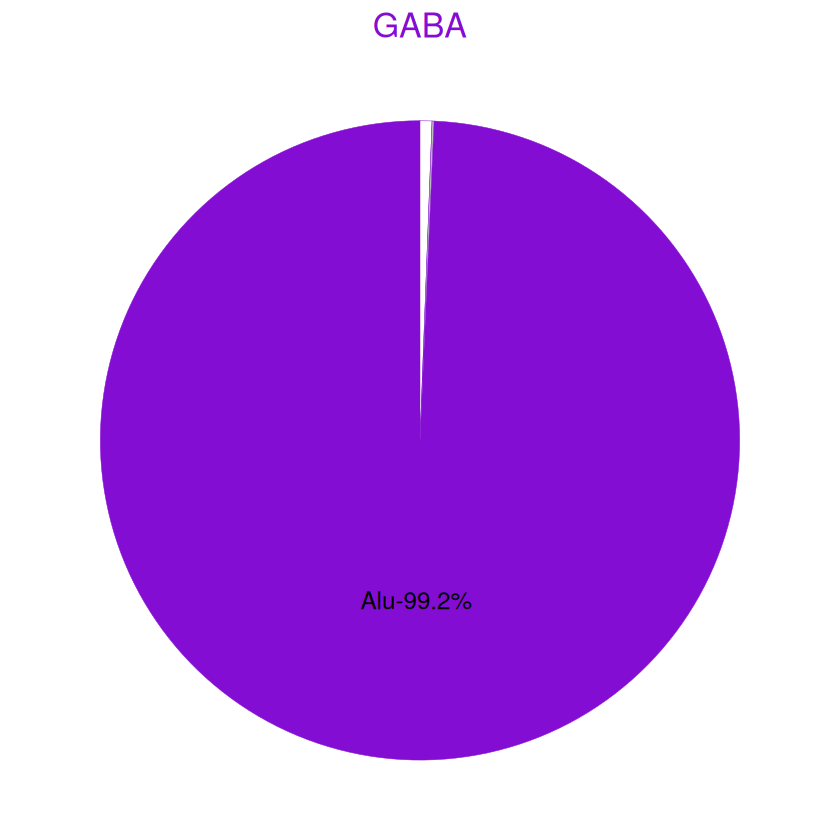

In [33]:
pie_chart_GABA <- ggplot(data[which(data$group=='GABA'),], aes(x = "", y = proportion, fill = category)) +
  geom_bar(stat = "identity", width = 0.1, color = colors[1], size = 0.1) + # 添加边框颜色和大小
  scale_fill_manual(values = c(colors[1],"grey","white"), guide = guide_legend(title = NULL))+
  coord_polar(theta = "y") +
  theme_void() +
  theme(legend.position = "none") + # 隐藏图例，因为我们直接在图上标注了类别
  geom_text(aes(label = c(paste0("Alu-",proportion*100, "%")[1],'',''), y = proportion), 
            position = position_stack(vjust = 0.5), size = 5) # 添加标签和百分比

pie_chart_GABA_title <- pie_chart_GABA +
  ggtitle("GABA") +
  theme(plot.title = element_text(hjust = 0.5, vjust = 0.5, color = colors[1], size = 20))

pie_chart_GABA_title

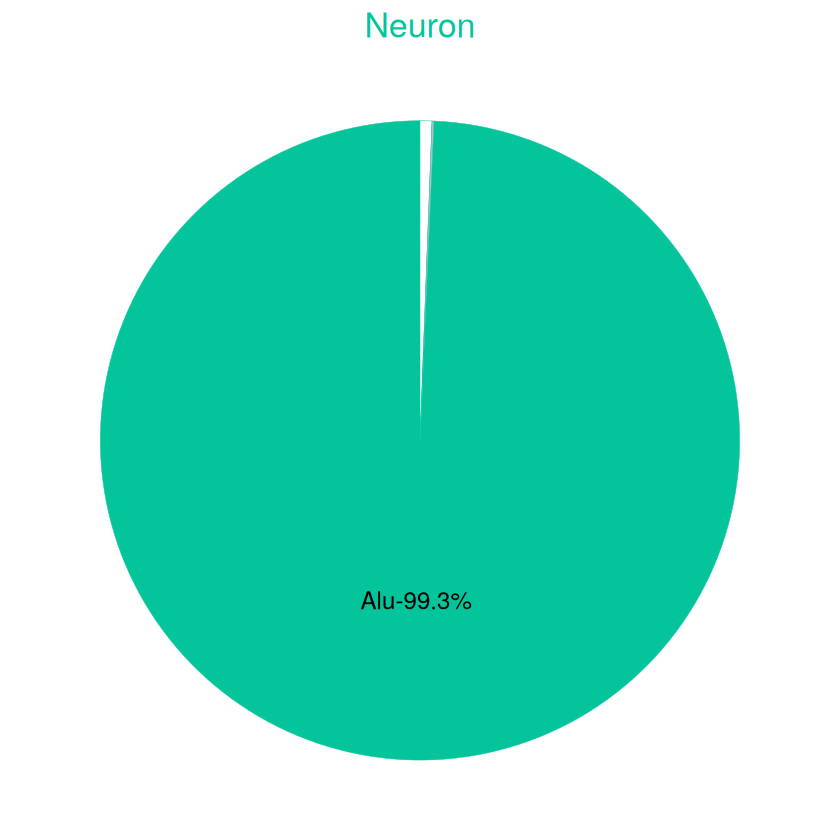

In [35]:
pie_chart_neuron <- ggplot(data[which(data$group=='Neuron'),], aes(x = "", y = proportion, fill = category)) +
  geom_bar(stat = "identity", width = 0.1, color = colors[2], size = 0.1) + # 添加边框颜色和大小
  scale_fill_manual(values = c(colors[2],"grey","white"), guide = guide_legend(title = NULL))+
  coord_polar(theta = "y") +
  theme_void() +
  theme(legend.position = "none") + # 隐藏图例，因为我们直接在图上标注了类别
  geom_text(aes(label = c(paste0("Alu-",proportion*100, "%")[1],'',''), y = proportion), 
            position = position_stack(vjust = 0.5), size = 5) # 添加标签和百分比

pie_chart_neuron_title <- pie_chart_neuron +
  ggtitle("Neuron") +
  theme(plot.title = element_text(hjust = 0.5, vjust = 0.5, color = colors[2], size = 20))

pie_chart_neuron_title

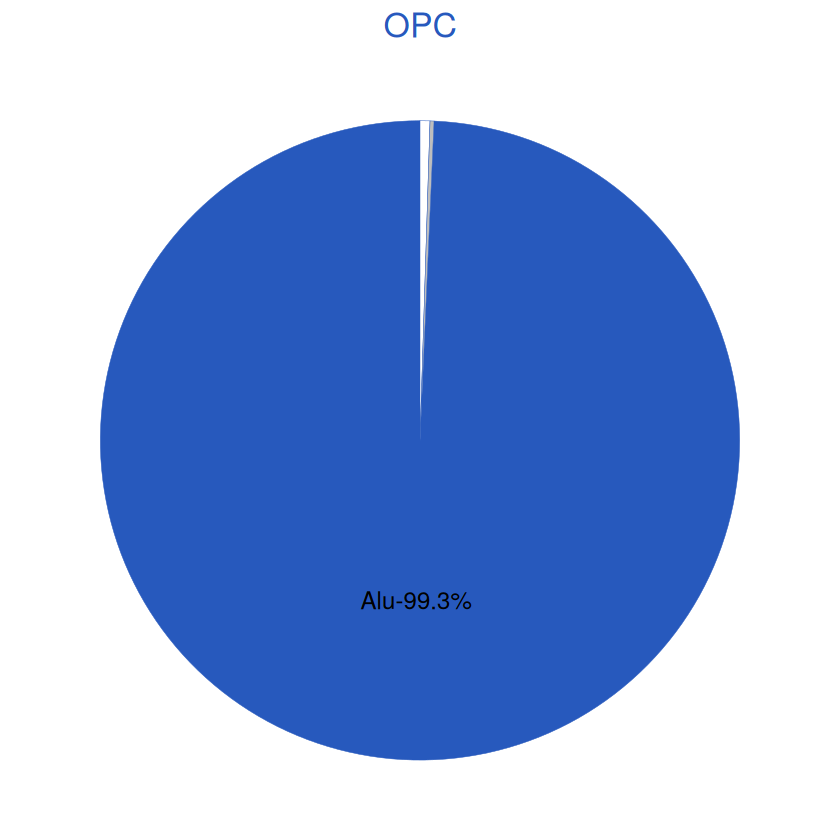

In [36]:
pie_chart_opc <- ggplot(data[which(data$group=='OPC'),], aes(x = "", y = proportion, fill = category)) +
  geom_bar(stat = "identity", width = 0.1, color = colors[3], size = 0.1) + # 添加边框颜色和大小
  scale_fill_manual(values = c(colors[3],"grey","white"), guide = guide_legend(title = NULL))+
  coord_polar(theta = "y") +
  theme_void() +
  theme(legend.position = "none") + # 隐藏图例，因为我们直接在图上标注了类别
  geom_text(aes(label = c(paste0("Alu-",proportion*100, "%")[1],'',''), y = proportion), 
            position = position_stack(vjust = 0.5), size = 5) # 添加标签和百分比

pie_chart_opc_title <- pie_chart_opc +
  ggtitle("OPC") +
  theme(plot.title = element_text(hjust = 0.5, vjust = 0.5, color = colors[3], size = 20))

pie_chart_opc_title

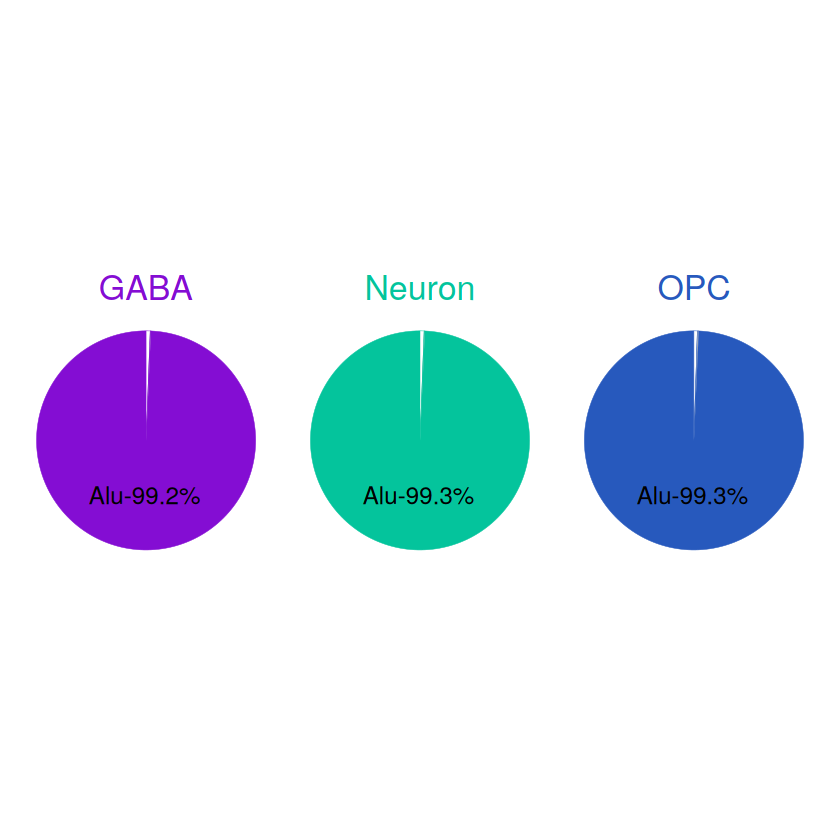

In [37]:
# 使用 patchwork 排列图形
combined_charts <- pie_chart_GABA_title+pie_chart_neuron_title+pie_chart_opc_title
combined_charts

In [65]:
all_res_num_gene_region <- c(26973,4472,1538,1886,14,33169,5778,2563,3041,45,5903,805,413,492,7)
celltype_info <- rep(c("GABA","Neuron","OPC"),each=5)
region_info <- rep(c('Intronic','Intergenic','3UTR','Exonic','5UTR'),times=3)

In [67]:
res_region_data <- data.frame(cbind(celltype_info,all_res_num_gene_region,region_info))
colnames(res_region_data) <- c('cell_type','res_num','region_info')

In [68]:
df_long <- reshape2::melt(res_region_data, id.vars = c("cell_type", "region_info"))


In [69]:

# 在绘制图形之前，先对ad_dp进行排序
df_long$region_info <- factor(df_long$region_info, levels = c('Intronic','Intergenic','3UTR','Exonic','5UTR'), ordered = TRUE)
df_long$value <- as.numeric(df_long$value)
# 指定颜色
#colors <- c("AG_TC" = "#840dd3","CT_GA" = "#04c49c") # 自定义颜色，这里举例红色和蓝色
colors <- c("GABA" = "#840dd3","Neuron" = "#04c49c",'OPC' = "#2759bd")



In [70]:
df_long

cell_type,region_info,variable,value
<chr>,<ord>,<fct>,<dbl>
GABA,Intronic,res_num,26973
GABA,Intergenic,res_num,4472
GABA,3UTR,res_num,1538
GABA,Exonic,res_num,1886
GABA,5UTR,res_num,14
Neuron,Intronic,res_num,33169
Neuron,Intergenic,res_num,5778
Neuron,3UTR,res_num,2563
Neuron,Exonic,res_num,3041


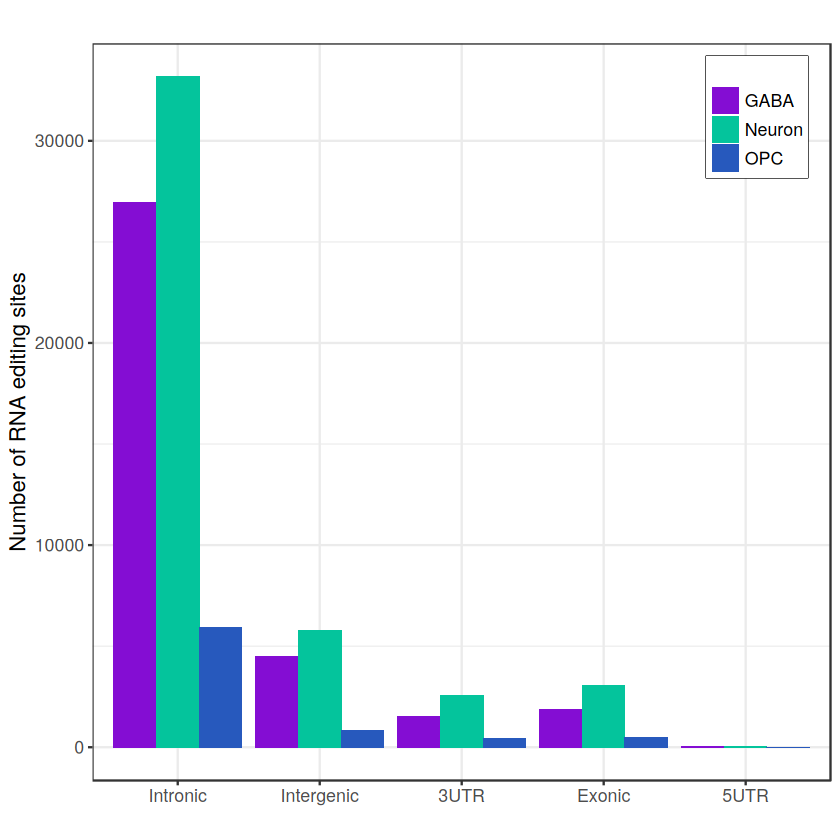

In [72]:

# 使用ggplot2绘制分组柱状图，加入颜色指定
ggplot(df_long, aes(x = region_info, y = value, fill = cell_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = colors) + # 指定颜色
  #facet_wrap(~ cell_type, ncol = 1, scales = "free_x") +
  labs(title = "",
       x = "", y = "Number of RNA editing sites", fill = "") +
  theme_bw() +
  theme(text = element_text(size = 13),
        legend.position = c(0.9,0.9),
        legend.box.background = element_rect(color = "black", size = 0.5),
        legend.spacing.x = unit(1, "mm"),     # 调整水平间距
        legend.spacing.y = unit(1, "mm"),     # 调整垂直间距
        legend.margin = margin(3, 3, 3, 3)
  ) +
  guides(fill = guide_legend(reverse = F)) 